In [1]:
import numpy as np
import matplotlib.pylab as plt
from ugradio.dft import dft, idft
import scipy.signal

plt.rcParams.update({'font.size': 24})

Error loading librtlsdr. Make sure librtlsdr (and all of its dependencies) are in your path


In [2]:
def freq_to_period(freq):
    '''take frequency (in kHz)
    and converts to period (in microseconds)'''
    return (1/freq) * 1000

In [3]:
# range of samp frequencies in kHz
samp_freqs = np.arange(1000, 2400, 200)

# array containing the voltage outputs for all the different frequencies
all_data = {}
for freq in samp_freqs:
    fname = '../data_sec5/freq' + str(freq) + '.npy'
    data = np.load(fname)
    all_data[freq] = data[0]

# Section 5.2

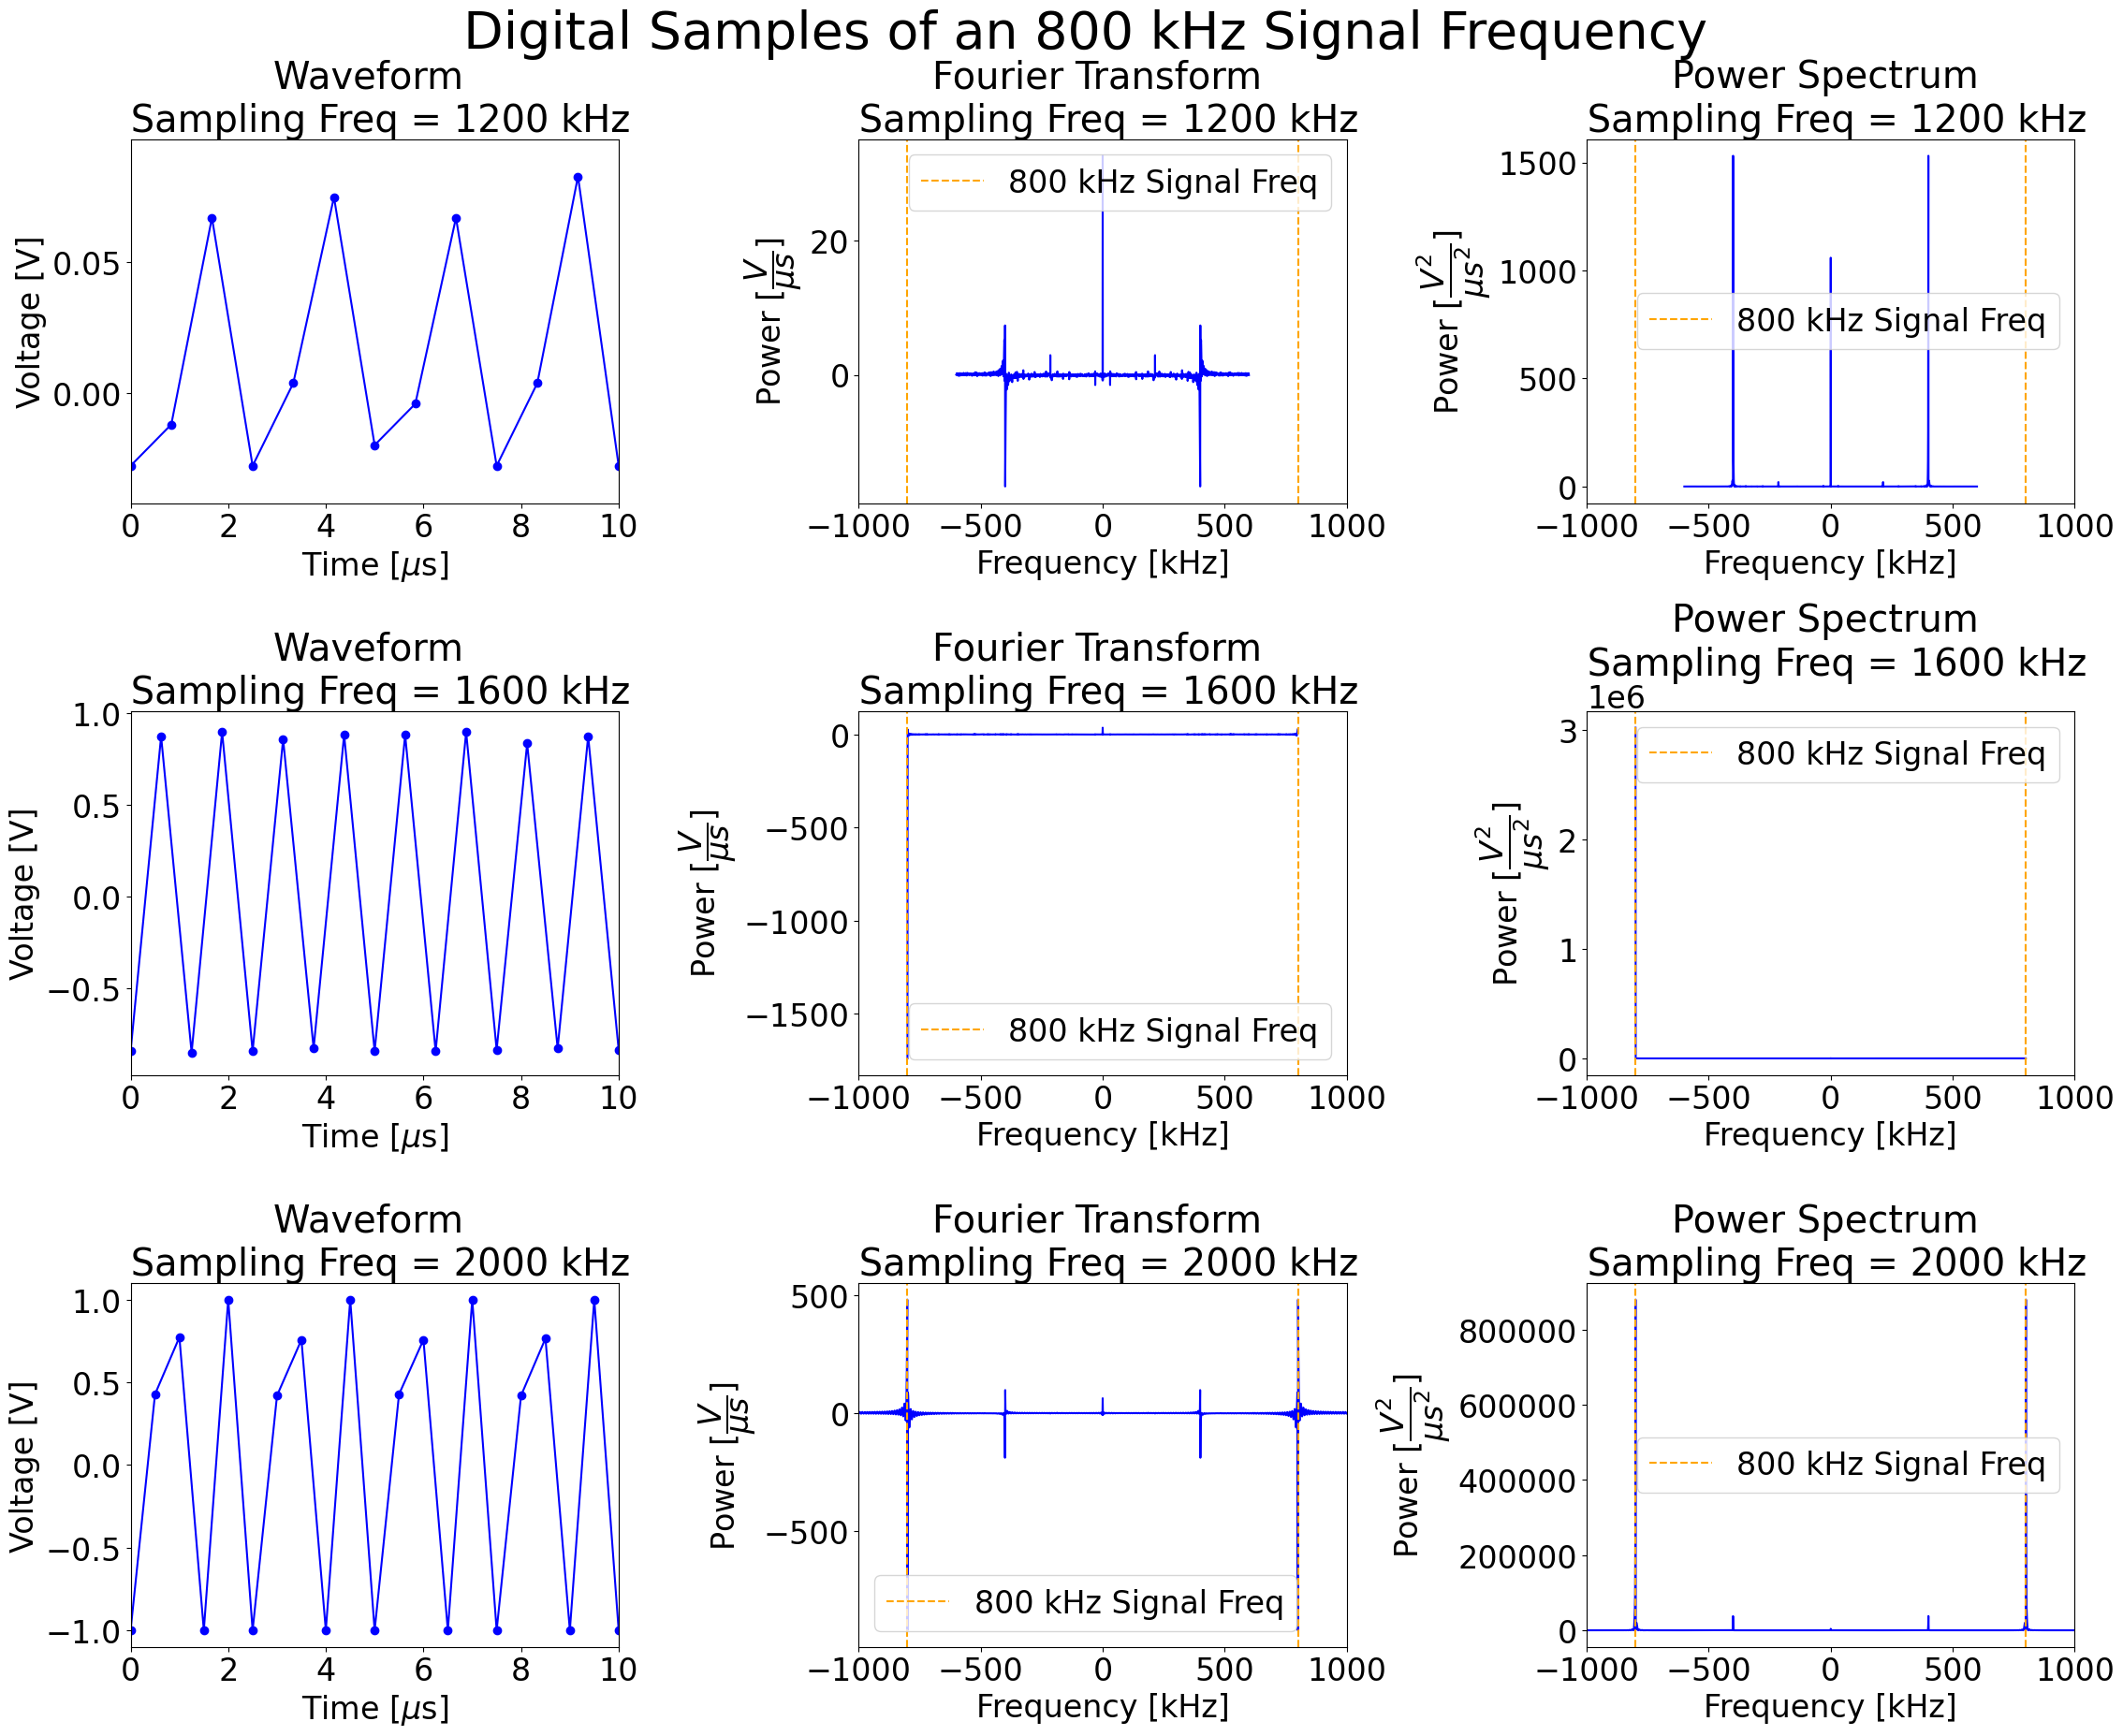

In [35]:
def plot_all_data():
    
    # plotter
    plt_freqs = [1200, 1600, 2000]
    fig, axs = plt.subplots(len(plt_freqs), 3,  figsize=(25, 20))
    fig.tight_layout(pad=5.0)
    fig.suptitle("Digital Samples of an 800 kHz Signal Frequency\n", fontsize=40)
    for i in range(len(plt_freqs)):
        freq = plt_freqs[i]
        data = all_data[freq]
        
        # Waveform
        wave = axs[i, 0]
        time = np.arange(len(data)) * freq_to_period(freq)
        wave.plot(time, data, color="blue")
        wave.scatter(time, data, color="blue")
        wave.set_title('Waveform \n Sampling Freq = ' + str(freq) + ' kHz')
        wave.set_xlabel(r'Time [$\mu$s]')
        wave.set_xlim(0, 10)
        wave.set_ylabel('Voltage [V]')

        # Fourier Transform
        f, Fx = dft(data, vsamp=freq)
        ft = axs[i, 1]
        ft.plot(f, Fx, color="blue")
        ft.axvline(x = 800, color='orange', label = '800 kHz Signal Freq', linestyle='dashed')
        ft.axvline(x = -800, color='orange', linestyle='dashed')
        ft.set_title('Fourier Transform \n Sampling Freq = ' + str(freq) + ' kHz')
        ft.set_xlabel(r'Frequency [kHz]')
        ft.set_xlim(-1000, 1000)
        ft.set_ylabel('Power [$\dfrac{V}{\mu s}$]')
        ft.legend()

        # Power
        ps = axs[i, 2]
        ps.plot(f, np.abs(Fx)**2, color="blue")
        ps.axvline(x = 800, color='orange', label = '800 kHz Signal Freq', linestyle='dashed')
        ps.axvline(x = -800, color='orange', linestyle='dashed')
        ps.set_title('Power Spectrum \n Sampling Freq = ' + str(freq) + ' kHz')
        ps.set_xlabel(r'Frequency [kHz]')
        ps.set_xlim(-1000, 1000)
        ps.set_ylabel('Power [$\dfrac{V^2}{\mu s^2}$]')
        ps.legend()

    plt.show()
plot_all_data()

# Calculate Power Spectrum

# Plot Power Spectrum

### 5.4 Observe Spectral Leakage 
Under perfect conditions, we would have a simple vertical line at the signal frequency, but with real-world conditions, we end up with a sink function. This sink function should be centered at the signal frequency, but aliasing influences the results.

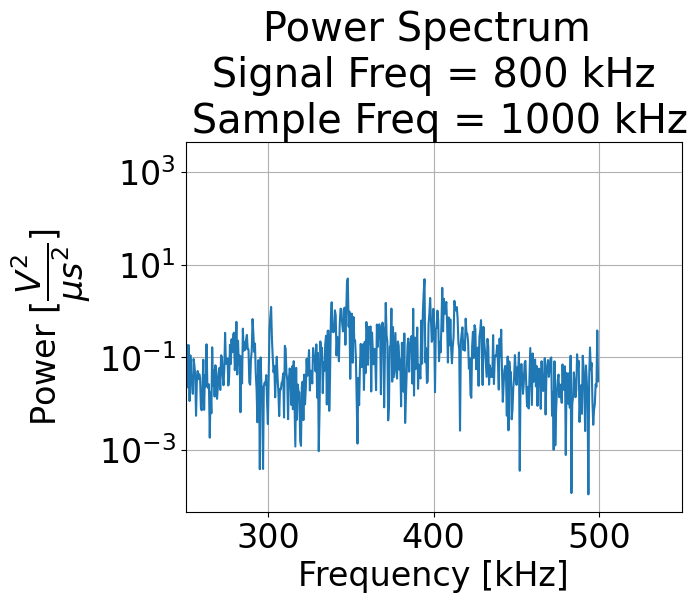

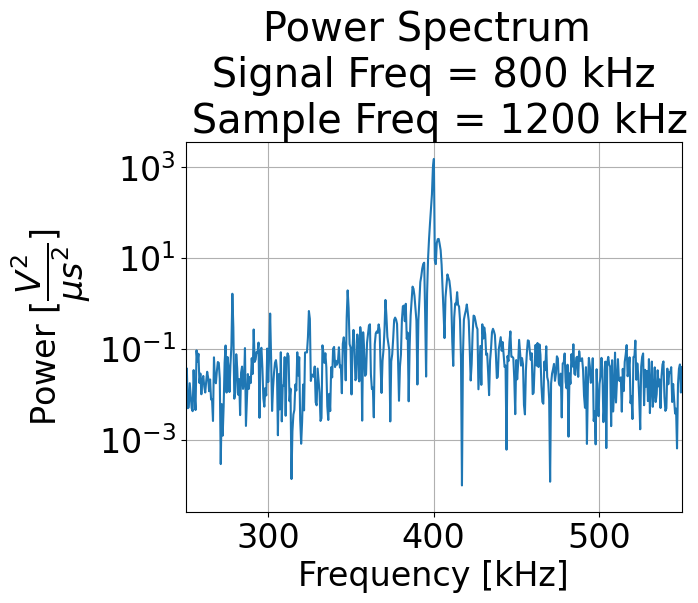

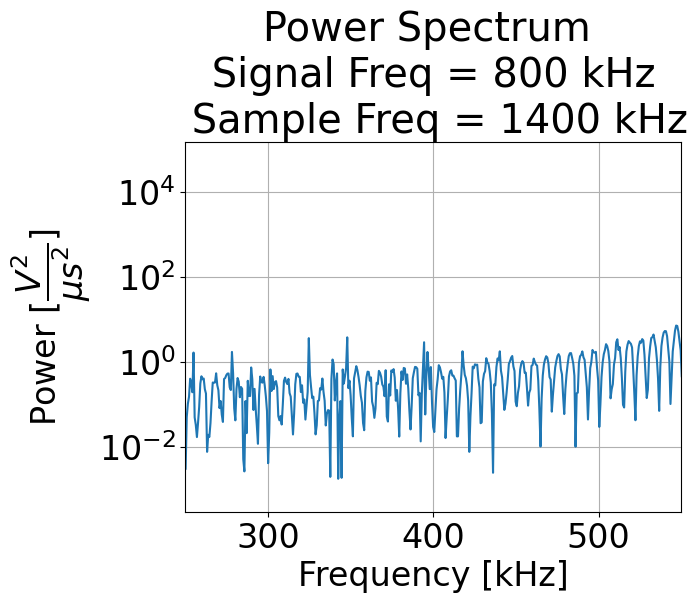

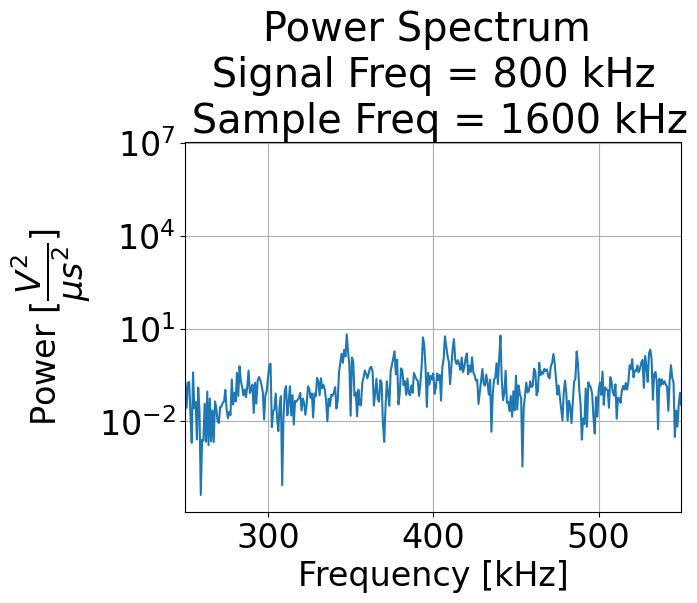

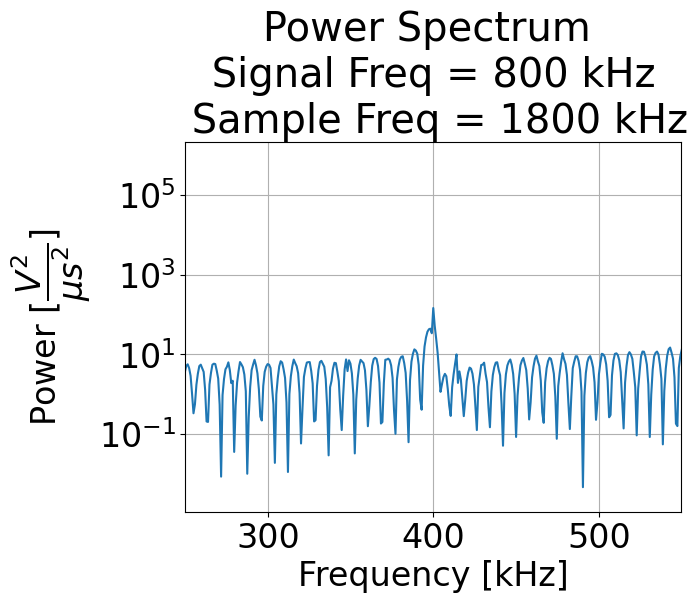

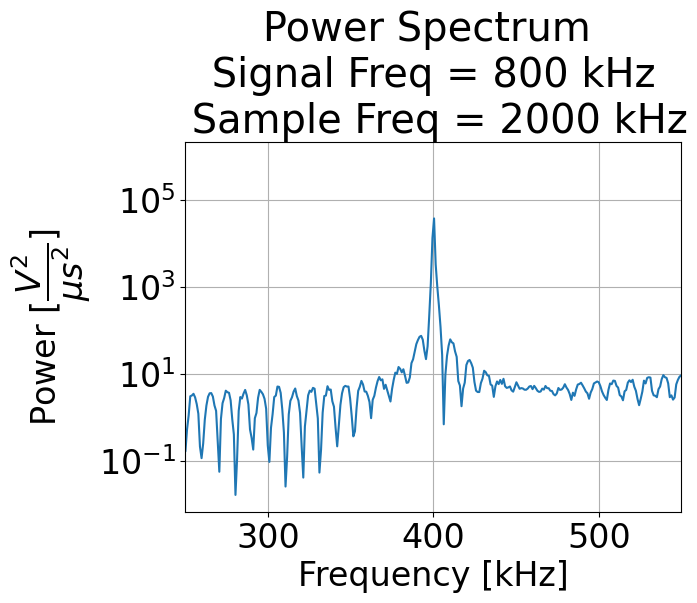

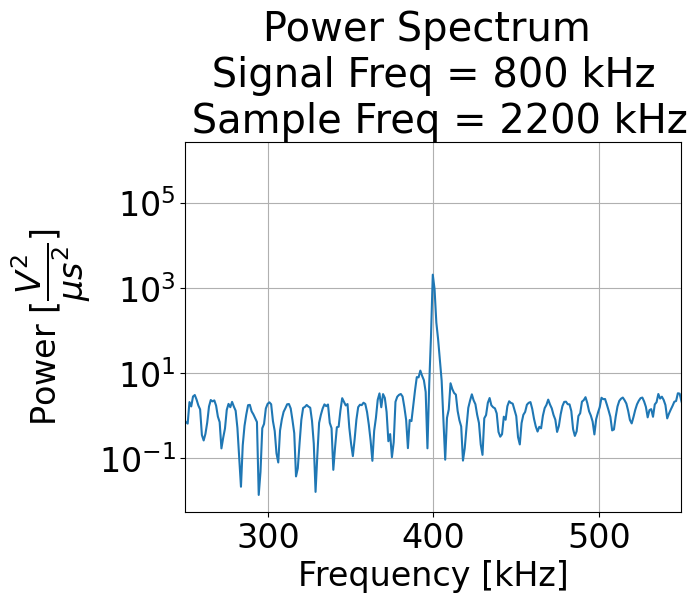

In [32]:
def plot_log_power():    
    for samp_freq, data in all_data.items():
        x, y = dft(data, vsamp=samp_freq)
        y = np.abs(y)**2
        
        plt.figure()
        plt.plot(x, y)
        plt.title('Power Spectrum \n Signal Freq = 800 kHz \n Sample Freq = ' + str(samp_freq) + ' kHz')
        plt.grid(visible=True)

        # adjust x axis
        plt.xlim(250, 550) 
        plt.xlabel('Frequency [kHz]')

        # adjust y axis
        plt.yscale("log")
        plt.ylabel('Power [$\dfrac{V^2}{\mu s^2}$]')
        
        plt.show()
        
        # break # comment this out if desired
 
# %matplotlib inline
plot_log_power()

# ACF

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


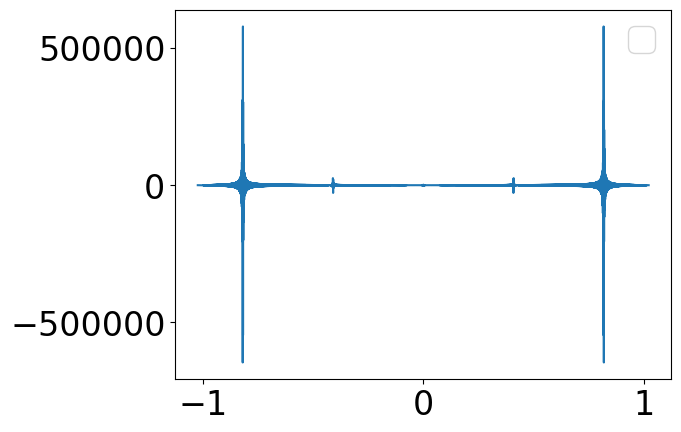

In [31]:
def plot_acf(): 
    samp_freq = 2000   
    data = all_data[samp_freq]
    fa, F_acf = dft(np.convolve(data, data), vsamp=samp_freq)
    fa, acf = idft(F_acf, fa, vsamp=samp_freq)
    npc = np.correlate(data, data, mode='full')
    ssc = scipy.signal.correlate(data, data)

    x = np.linspace(-1, 1, len(acf))
    # plt.scatter(x, npc, label='np correlate')
    # plt.scatter(x, ssc, label='scipy correlate')
    # plt.scatter(x, acf, label='acf')
    
    plt.plot(fa, F_acf)
    f, Fx = dft(data, vsamp=samp_freq)
    f1, Fx1 = dft(np.abs(Fx)**2, f=f, vsamp=samp_freq)
    # plt.plot(f1, Fx1)
    
    plt.legend()
    plt.show()

    return
plot_acf()